# Flights Delay and Cancelation Exploration
## by Bakir Alkurdi

## Investigation Overview

In this investigation, I wanted to look at the characteristics of delayed and cancelled flighs that could be used to enhance the flight timing industry. The main focus was on four variables of flights: Month, Origin, TotalDelay and Distance.

## Dataset Overview

The data consisted of delay times (arrival and departure) and cancelled flights and attributes of approximately 1,900,000 flights. The attributes included flights distance in miles, AirTime in minutes, TotalDelay (Departure Delay + Arrival Delay), origin airport and carriers. 2 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Final_Data.csv')

## Total Delay Distribution

Total Delay in this dataset take on a very range of values, from -9 minutes at the lowest, to about 4900 minutes at the highest. Plotted on a logarithmic scale, the distribution of flights total delay takes on nearly a Unimodal shape.

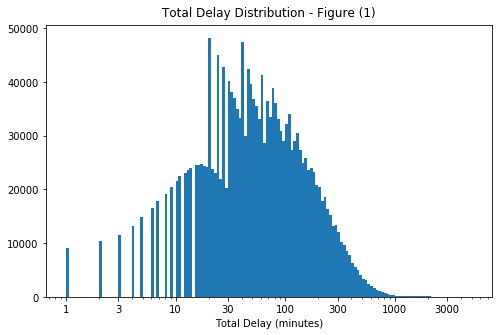

In [10]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['Distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TotalDelay', bins = bins)
plt.xscale('log')
x_ticks = [1,3,10,30,100,300,1000,3000]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Total Delay (minutes)')
plt.title('Total Delay Distribution - Figure (1)', y=1.01);

## Delay Level

Delay Level consist of 3 main categories:<br>
`1.`Delay >= 10 min : 'low'<br>
`2.`10 min < Delay <= 35 min : 'medium'<br>
`3.`35 min < Delay : 'high'<br>
Figure (2) shows that the high level is the most common in our dataset with more than 1 million delayed flights followed by medium followed by low levels. The counts in the y-axis is in Thousands.

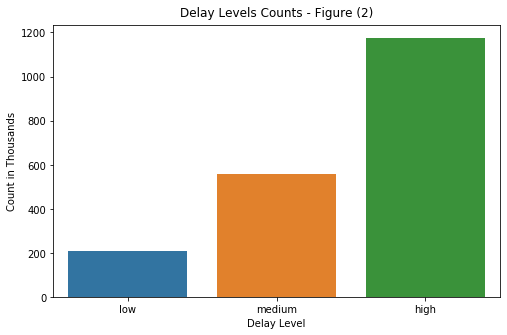

In [43]:
plt.figure(figsize=[8,5])
sb.countplot(data = df, x = 'delay_level')
y_ticks = np.arange(0, 1400000, 200000)
y_labels = ['0', '200', '400', '600', '800', '1000', '1200']
plt.yticks(y_ticks, y_labels)
plt.xlabel('Delay Level')
plt.ylabel('Count in Thousands')
plt.title('Delay Levels Counts - Figure (2)', y=1.01);

## Affect of Month in Cancelation of The Flights

Figure (3) shows that all cancelled flights lies in October, November and December.<br>
December have the most cancelled flight with more than 400 cancelled flights.

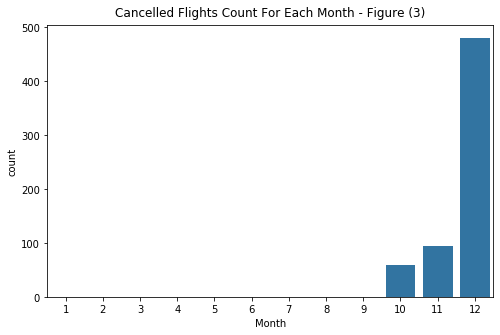

In [36]:
df_c = df[df['Cancelled'] == 1]
months = np.arange(1,12+1,1)
plt.figure(figsize=[8,5])
ax = sb.countplot(data = df_c, x = 'Month', hue = 'Cancelled', order=months)
plt.xlabel('Month')
plt.title('Cancelled Flights Count For Each Month - Figure (3)', y=1.01)
ax.get_legend().remove()

## Delay Level Count For Each Carrier

Figure (4) agree with the finding of Figure (2). This figure shows the delay level for each carrier ordered by the most number of flights from left to right.
This figure shows clearly that the there is no strong relationship between delay level and carrier because all carriers tend to have delay level from largest to smallest 'high', 'medium', 'low' respectively as its is in the over all statistics which is shown in Univariate section.

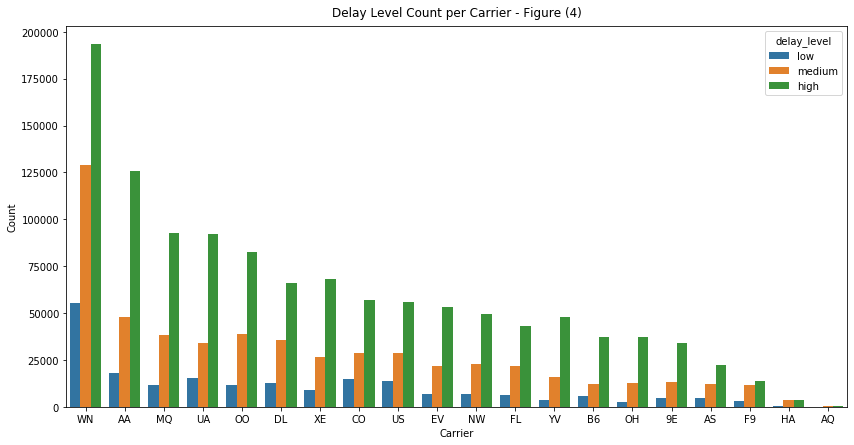

In [40]:
order = df.UniqueCarrier.value_counts().index
plt.figure(figsize=(14,7))
sb.countplot(data = df, x = 'UniqueCarrier', hue = 'delay_level', order=order)
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.title('Delay Level Count per Carrier - Figure (4)', y=1.01);

## Total Delay - Distance Relationship For Each Month

Figure (5) shows that the relationship between TotalDelay and Distance varies slightly along the year for example November or month 11 is less likely to have delays as in December or month 12.

Also May, June, July and August is more likely to be delayed than the rest of the year because it is summer and there is a lot of flights which is applicable in December because it is Christmas and people travel a lot.

December has a higher possibility of very high total delay time than other months.

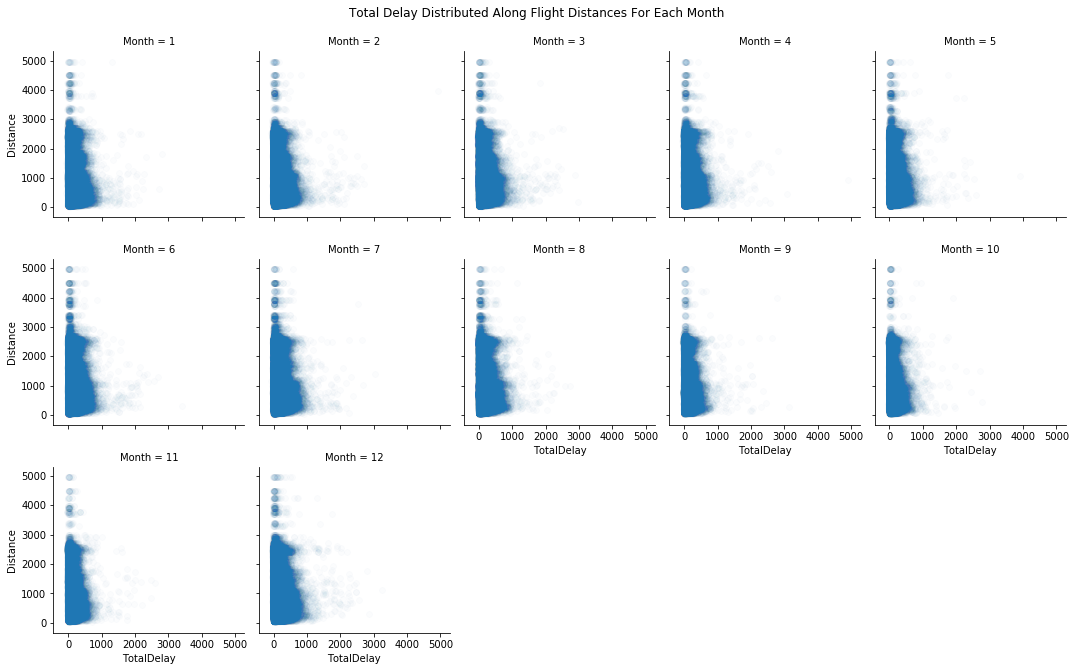

In [50]:
order = np.arange(1,13,1)
g = sb.FacetGrid(data = df, col = 'Month', height = 3, col_wrap=5, margin_titles = True, col_order=order)
g.map(plt.scatter, 'TotalDelay', 'Distance', alpha=1/70)
g.fig.suptitle('Total Delay Distributed Along Flight Distances For Each Month - Figure(5)', y=1.03);